In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Overwiev the Dataset

(2062, 64, 64) (2062, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(-0.5, 63.5, 63.5, -0.5)

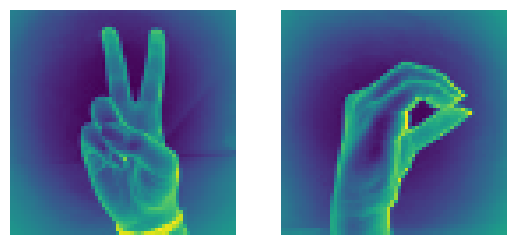

In [2]:
X = np.load('./sign-language-digits-dataset/X.npy')
y = np.load('./sign-language-digits-dataset/Y.npy')
print(X.shape, y.shape)

img_size = 64
print(y[564])
plt.subplot(1,2,1)
plt.imshow(X[564].reshape(img_size,img_size))
plt.axis('off')

print(y[1])
plt.subplot(1,2,2)
plt.imshow(X[1].reshape(img_size,img_size))
plt.axis('off')



In [3]:
print("X shape: " , X.shape)
print("Y shape: " , y.shape)

X shape:  (2062, 64, 64)
Y shape:  (2062, 10)


In [4]:
X = X.reshape(-1,64,64,1)
print("X shape after reshape: " , X.shape)

X shape after reshape:  (2062, 64, 64, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print(f"Train set: {len(X_train)} sample")
print(f"Validation set: {len(X_val)} sample")
print(f"Test set: {len(X_test)} sample")
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Train set: 1401 sample
Validation set: 248 sample
Test set: 413 sample
Train set shape: (1401, 64, 64, 1)
Validation set shape: (248, 64, 64, 1)
Test set shape: (413, 64, 64, 1)


In [6]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(64, 64, 1)))
model.add(Conv2D(filters=32, kernel_size=(6,6), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=64, kernel_size=(4,4), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [7]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [8]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [9]:
epochs = 100
batch_size = 64

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

steps_per_epoch = max(1, X_train.shape[0] // batch_size)

In [11]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,validation_data=(X_val, y_val), steps_per_epoch=steps_per_epoch)

Epoch 1/100
 1/21 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1094 - loss: 2.3037

c:\Users\MONSTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0916 - loss: 2.3190 - val_accuracy: 0.0685 - val_loss: 2.3031
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0781 - loss: 2.3059 - val_accuracy: 0.0685 - val_loss: 2.3030
Epoch 3/100


c:\Users\MONSTER\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1301 - loss: 2.3009 - val_accuracy: 0.1331 - val_loss: 2.3022
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0469 - loss: 2.3038 - val_accuracy: 0.1411 - val_loss: 2.3020
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1283 - loss: 2.2992 - val_accuracy: 0.1895 - val_loss: 2.2637
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1406 - loss: 2.3066 - val_accuracy: 0.2097 - val_loss: 2.2558
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1858 - loss: 2.2000 - val_accuracy: 0.3024 - val_loss: 1.7697
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1875 - loss: 2.1572 - val_accuracy: 0.2540 - val_loss: 1.8473
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.2962 - loss: 1.9060 - val_accuracy: 0.5323 - val_loss: 1.3303
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3906 - loss: 1.5401 - val_accuracy: 0.6250 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


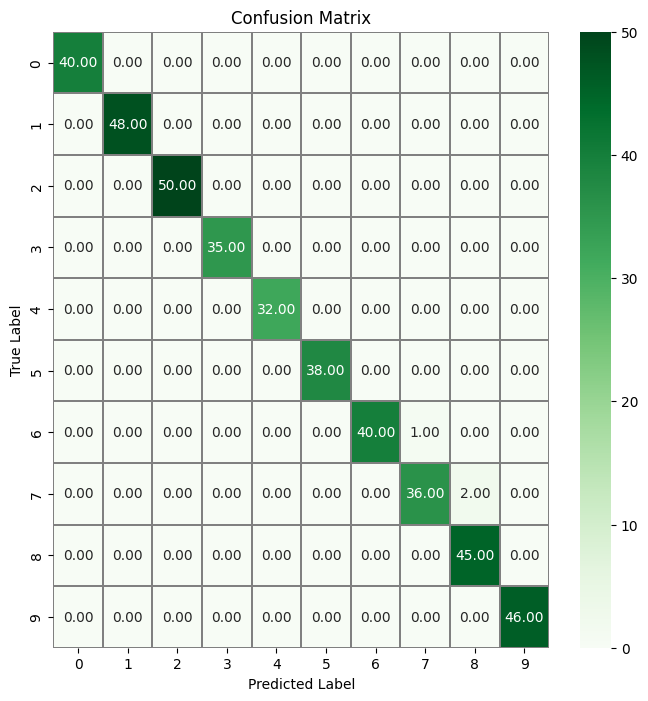

In [13]:
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()